In [3]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import plotly.express as px, numpy as np, re, ipywidgets as widgets, scipy.stats as stats
from sklearn.preprocessing import OneHotEncoder

In [2]:
from utils import MScore_to_int

In [4]:
companies_df = pd.read_csv('/content/drive/MyDrive/CRA/cleaned-credit-risk.tar.gz', compression='gzip')
companies_df

,cleaned-credit-risk.tar.gz,Company name,Turnover.2020,Turnover.2019,Turnover.2018,Turnover.2017,Turnover.2016,Turnover.2015,EBIT.2020,EBIT.2019,...,ROE.2018,ROE.2017,ROE.2016,ROE.2015,TAsset.2020,TAsset.2019,TAsset.2018,TAsset.2017,TAsset.2016,TAsset.2015
0,1.0,LENDLEASE S.R.L.,29458.0,16716.0,9612.0,8097.0,7941.0,5600.0,-1556.0,-4540.0,...,8.24,-146.65,60.76,-471.72,49263.0,28268.0,15455.0,15992.0,13597.0,11659.0
1,2.0,PRICEWATERHOUSECOOPERS BUSINESS SERVICES SRL (...,16731.0,16403.0,16843.0,12241.0,9252.0,9515.0,1838.0,841.0,...,61.42,-55.57,-127.29,-87.13,16550.0,16887.0,16468.0,10773.0,6697.0,8933.0
2,3.0,EVISO S.P.A.,48568.0,43039.0,34302.0,25791.0,19760.0,6941.0,1661.0,1464.0,...,57.52,42.73,20.34,44.62,13500.0,9620.0,7371.0,5432.0,4170.0,2862.0
3,4.0,CASA SERVICE MACHINE,47999.0,43484.0,43043.0,41682.0,51267.0,52584.0,416.0,255.0,...,-17.24,0.71,2.89,6.45,24978.0,25032.0,25729.0,21632.0,25403.0,24941.0
4,5.0,PANFERTIL SPA,45948.0,47336.0,45626.0,48222.0,57074.0,62263.0,44.0,713.0,...,-5.17,-6.74,0.03,-8.19,36823.0,34659.0,36205.0,38423.0,41847.0,41323.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121004,21251.0,ODONE & SLOA S.R.L.,3161.0,2562.0,2559.0,2334.0,3692.0,2537.0,60.0,101.0,...,0.62,-4.80,-7.85,-12.84,2487.0,2317.0,2351.0,2521.0,2797.0,3152.0
121005,21252.0,GARRIDO MURO SOCIEDAD LIMITADA,3161.0,3146.0,2989.0,3101.0,2746.0,3154.0,260.0,13.0,...,1.88,3.10,2.90,5.62,2547.0,1855.0,1692.0,1843.0,1773.0,1699.0
121006,21253.0,CENTRO INGROSSO JOLLY S.R.L.,3161.0,2519.0,2290.0,2244.0,1761.0,1821.0,74.0,48.0,...,3.74,3.54,18.85,0.58,2961.0,2552.0,2604.0,2474.0,1546.0,1222.0
121007,21254.0,SALONES COMATEL SL,3161.0,4514.0,4435.0,4231.0,3908.0,2051.0,194.0,733.0,...,15.59,25.60,40.55,-9.98,3576.0,4259.0,4747.0,3993.0,3027.0,2333.0


In [5]:
countries_df = pd.read_csv('/content/drive/MyDrive/CRA/countries.tar.gz', compression='gzip')[['name', 'alpha-2']]
cities_df = pd.read_csv('/content/drive/MyDrive/CRA/world-cities.tar.gz', low_memory=False, compression='gzip')[['City', 'Country', 'Latitude', 'Longitude']]

In [6]:
countries_df['alpha-2'] = countries_df['alpha-2'].str.lower()
countries_df = countries_df.rename(columns={'name':'Country'})
countries_df

,Country,alpha-2
0,Afghanistan,af
1,Åland Islands,ax
2,Albania,al
3,Algeria,dz
4,American Samoa,as
...,...,...
244,Wallis and Futuna,wf
245,Western Sahara,eh
246,Yemen,ye
247,Zambia,zm


In [7]:
cities_df['City'] = cities_df['City'].str.capitalize()
cities_df = cities_df.rename(columns={'Country':'alpha-2'})
cities_df

,City,alpha-2,Latitude,Longitude
0,Aixas,ad,42.483333,1.466667
1,Aixirivali,ad,42.466667,1.500000
2,Aixirivall,ad,42.466667,1.500000
3,Aixirvall,ad,42.466667,1.500000
4,Aixovall,ad,42.466667,1.483333
...,...,...,...,...
3173953,Zimre park,zw,-17.866111,31.213611
3173954,Ziyakamanas,zw,-18.216667,27.950000
3173955,Zizalisari,zw,-17.758889,31.010556
3173956,Zuzumba,zw,-20.033333,27.933333


In [8]:
companies_locations_df = companies_df[['Company name', 'Region', 'Country']].merge(countries_df, on='Country')
companies_locations_df = companies_locations_df.rename(columns={'Region':'City'})
companies_locations_df = companies_locations_df .merge(cities_df, on=['City', 'alpha-2'])

In [9]:
companies_locations_df['Latitude'] += np.random.normal(0, 0.03, len(companies_locations_df))
companies_locations_df['Longitude'] += np.random.normal(0, 0.03, len(companies_locations_df))

In [10]:
visualize_widget = widgets.Select(options=['Density Mapbox', 'Hexagon Layer'], value='Density Mapbox', description='Map:', disabled=False)
visualize_widget

Select(description='Map:', options=('Density Mapbox', 'Hexagon Layer'), value='Density Mapbox')

In [11]:
if (visualize_widget.value == 'Density Mapbox'):
    fig = px.density_mapbox(companies_locations_df, lat='Latitude', lon='Longitude', radius=1.2, center=dict(lat=46.2, lon=8.2), zoom=3, mapbox_style='open-street-map', hover_name='Company name')
else:
    layer = pdk.Layer(
    "HexagonLayer",
    companies_locations_df,
    get_position=["Longitude", "Latitude"],
    auto_highlight=True,
    elevation_scale=100,
    elevation_range=[0, 5000],
    pickable=True,
    extruded=True,
    coverage=3,
    )

    view_state = pdk.ViewState(
        longitude=7, latitude=43, zoom=4, pitch=40.5, bearing=-16,
    )
    fig = pdk.Deck(layers=[layer], initial_view_state=view_state)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

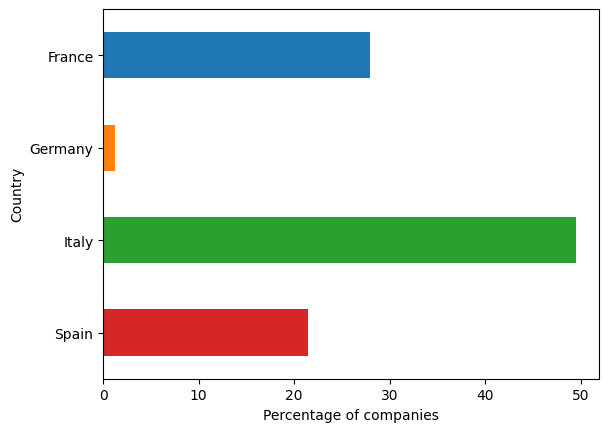

In [12]:
(companies_df.groupby('Country').size() / len(companies_df) * 100).plot(kind='barh', color=list(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])).invert_yaxis()
plt.xlabel('Percentage of companies');

In [13]:

year_widget = widgets.IntSlider(value=2020, min=2015, max=2020, description='Year:', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='d')
year_widget

IntSlider(value=2020, description='Year:', max=2020, min=2015)

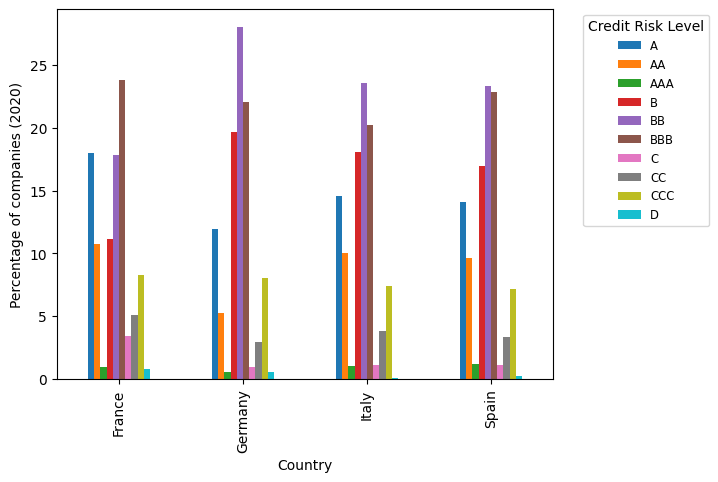

In [14]:
(companies_df.groupby(['Country', 'MScore.'+str(year_widget.value)]).size() / (companies_df.groupby(['Country']).size()) * 100).unstack().plot.bar()
plt.xlabel('Country')
plt.ylabel('Percentage of companies ('+str(year_widget.value)+')')
plt.legend(title='Credit Risk Level', fontsize='small', fancybox=True, bbox_to_anchor=(1.05, 1.0), loc='upper left');


In [16]:
for col in [c for c in companies_df.columns if c.startswith('MScore.')]:
    companies_df[str(col)+'.int'] = companies_df[str(col)].apply(lambda x: MScore_to_int(x))

TypeError: 'float' object is not subscriptable

In [17]:
# Function that takes a MScore and cast it into an integer value (0 means a low credit risk, 1 an high credit risk)
def MScore_to_int(x):
    return 0 if (str(x).lower().startswith(('a', 'b'))) else 1  # Convert the entire value to string and check if it starts with 'a' or 'b'

for col in [c for c in companies_df.columns if c.startswith('MScore.')]:
    companies_df[str(col)+'.int'] = companies_df[str(col)].apply(MScore_to_int)

In [18]:
low, high = [], []
for year in range(2015, 2021):
    low.append(companies_df['MScore.'+str(year)+'.int'].value_counts()[0])
    high.append(companies_df['MScore.'+str(year)+'.int'].value_counts()[1])
print('Average number of low level credit risk companies:', int(np.mean(low)))
print('Average number of high level credit risk companies:', int(np.mean(high)))

Average number of low level credit risk companies: 107824
Average number of high level credit risk companies: 13185


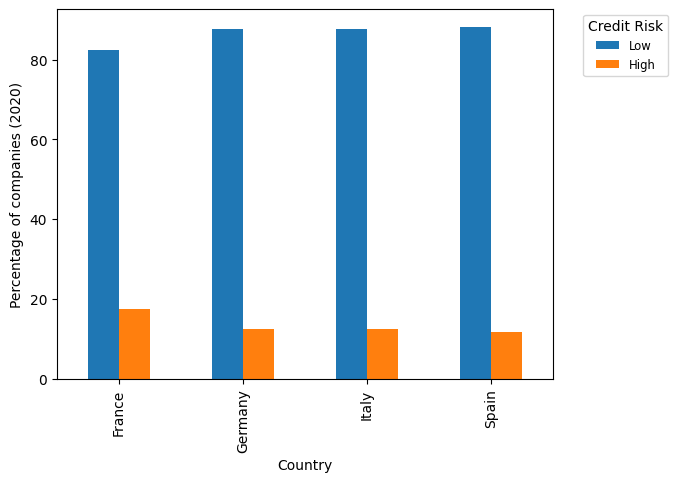

In [19]:
(companies_df.groupby(['Country', 'MScore.'+str(year_widget.value)+'.int']).size() / (companies_df.groupby(['Country']).size()) * 100).unstack().plot.bar()
plt.xlabel('Country')
plt.ylabel('Percentage of companies ('+str(year_widget.value)+')')
plt.legend(['Low', 'High'], title='Credit Risk', fontsize='small', fancybox=True, bbox_to_anchor=(1.05, 1.0), loc='upper left');


In [20]:
(companies_df.groupby(['MScore.'+str(year_widget.value)+'.int', 'Country', 'Region']).size() / (companies_df.groupby(['Country','Region']).size()) * 100).unstack()


MScore.2020.int                          0          1
Country Region                                       
France  Ain                      88.418079  11.581921
        Aisne                    82.547170  17.452830
        Allier                   83.941606  16.058394
        Alpes-Maritimes          79.387755  20.612245
        Alpes-de-Haute-Provence  96.624473   3.375527
...                                    ...        ...
Spain   Valencia                 91.955307   8.044693
        Valladolid               90.909091   9.090909
        Vizcaya                  84.916865  15.083135
        Zamora                   95.454545   4.545455
        Zaragoza                 88.707654  11.292346

[584 rows x 2 columns]